# <center> **LetsGrowMore(Virtual DataScience intern program) Task 1 Beginners level Project 2 Stock Market Prediction And Forecasting Using Stacked LSTM for more detail refer the below links**
<center>

   <h1> <b style="color:red">Hariom Kumar</b>

<br>
<nav>
<a href="https://www.linkedin.com/in/imharry404/">LinkedIn</a> ||
<a href="https://github.com/imHarry404/LetsGrowMore-DataScience_virtual_intern">Github</a>
</nav></center>

In [1]:
#Data Collection
import pandas_datareader as pdr
key=""

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)

In [3]:
#head vale view
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
import numpy as np
#pandas below 0.24+
print (df.columns.values.tolist())
#pandas above 0.24+
print (df.columns.to_numpy().tolist())

['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']
['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']


In [5]:
df1=df.reset_index()['Close']

In [6]:
print(df1)

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


Text(0.5, 0, 'X axis')

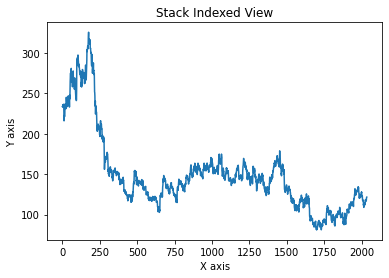

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title('Stack Indexed View')
plt.ylabel('Y axis')
plt.xlabel('X axis')

# LSTM are sensitive to the scale of the data. 
## so we apply MinMax scaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [10]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
print(training_size)
print(test_size)
print(train_data,test_data)

1322
713
[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.25347222]
 [0.26041667]
 [0.2563317 ]] [[0.24652778]
 [0.23611111]
 [0.25204248]
 [0.25919118]
 [0.25776144]
 [0.2681781 ]
 [0.25449346]
 [0.27103758]
 [0.24530229]
 [0.26756536]
 [0.27267157]
 [0.26633987]
 [0.27410131]
 [0.28615196]
 [0.27818627]
 [0.27205882]
 [0.27124183]
 [0.27798203]
 [0.27083333]
 [0.25857843]
 [0.24285131]
 [0.2250817 ]
 [0.23447712]
 [0.24346405]
 [0.23611111]
 [0.22937092]
 [0.21527778]
 [0.20976307]
 [0.20751634]
 [0.2060866 ]
 [0.20445261]
 [0.20098039]
 [0.21180556]
 [0.19301471]
 [0.18974673]
 [0.20302288]
 [0.21752451]
 [0.20629085]
 [0.19158497]
 [0.17381536]
 [0.17401961]
 [0.18361928]
 [0.17830882]
 [0.19362745]
 [0.20098039]
 [0.20486111]
 [0.21425654]
 [0.21813725]
 [0.21466503]
 [0.21343954]
 [0.21160131]
 [0.21711601]
 [0.20710784]
 [0.2005719 ]
 [0.20874183]
 [0.18647876]
 [0.19199346]
 [0.1807598 ]
 [0.20935458]
 [0.20792484]
 [0.21425654]
 [0.23366013]
 [0.23304739]
 [0.26184641]
 [0.2

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
20/20 [==============================] - 10s 263ms/step - loss: 0.0213 - val_loss: 0.0077
Epoch 2/100
20/20 [==============================] - 4s 213ms/step - loss: 0.0034 - val_loss: 9.5664e-04
Epoch 3/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0018 - val_loss: 8.1118e-04
Epoch 4/100
20/20 [==============================] - 4s 184ms/step - loss: 0.0019 - val_loss: 9.3426e-04
Epoch 5/100
20/20 [==============================] - 4s 199ms/step - loss: 0.0017 - val_loss: 9.2717e-04
Epoch 6/100
20/20 [==============================] - 4s 202ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 8/100
20/20 [==============================] - 4s 197ms/step - loss: 0.0013 - val_loss: 8.6459e-04
Epoch 9/100
20/20 [==============================] - 4s 196ms/step - loss: 0.0013 - val_loss: 8.8215e-04
Epoch 10/100
20/20 [==============================] - 4s 208ms/ste

20/20 [==============================] - 4s 181ms/step - loss: 2.8934e-04 - val_loss: 2.3417e-04
Epoch 77/100
20/20 [==============================] - 4s 187ms/step - loss: 2.6409e-04 - val_loss: 2.8650e-04
Epoch 78/100
20/20 [==============================] - 4s 183ms/step - loss: 2.8687e-04 - val_loss: 2.3754e-04
Epoch 79/100
20/20 [==============================] - 4s 190ms/step - loss: 3.3661e-04 - val_loss: 3.6428e-04
Epoch 80/100
20/20 [==============================] - 4s 190ms/step - loss: 3.0345e-04 - val_loss: 2.1819e-04
Epoch 81/100
20/20 [==============================] - 4s 184ms/step - loss: 2.8437e-04 - val_loss: 2.7790e-04
Epoch 82/100
20/20 [==============================] - 3s 174ms/step - loss: 3.6381e-04 - val_loss: 2.8201e-04
Epoch 83/100
20/20 [==============================] - 4s 187ms/step - loss: 2.7078e-04 - val_loss: 2.9315e-04
Epoch 84/100
20/20 [==============================] - 4s 197ms/step - loss: 2.5230e-04 - val_loss: 3.6096e-04
Epoch 85/100
20/20 [===

In [23]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [27]:
import matplotlib.pyplot as plt

In [28]:
len(df1)

2035

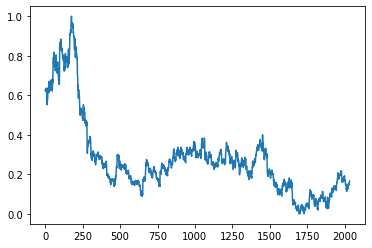

In [29]:
plt.plot(df1)
plt.show()